<a href="https://colab.research.google.com/github/Om334exe/RJPOLICE_HACK_191_ProblemStatement_4/blob/main/(FIR_ANALYSIS)main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteCrime Type: House-breaking
Crime Details: Unknown persons forcibly entered my residence through the back door:
Word not found in section_list.


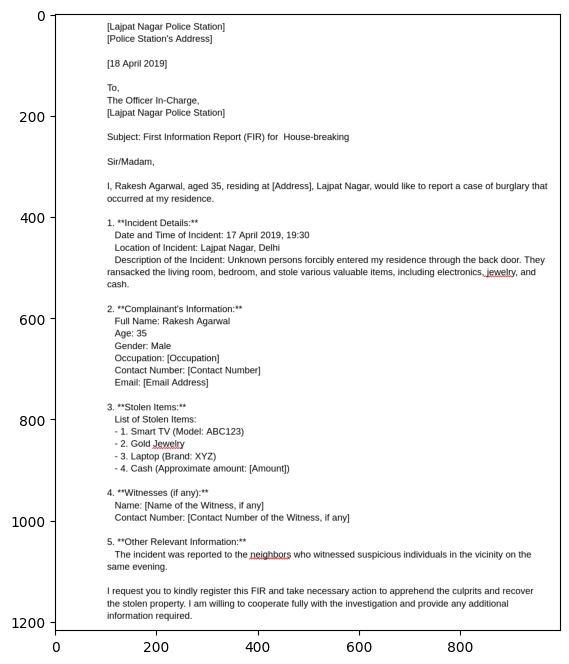

In [ ]:
import re
import easyocr
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from sections import section_list

def extract_crime_information(result, draw):
    crime_type = None
    crime_details = None

    # Define keywords related to crime type and details
    crime_type_keywords = ['Subject:', 'First Information Report (FIR) for']
    crime_details_keywords = ['Description of the Incident:']

    for detection in result:
        text, points = detection[1], detection[0]

        # Convert points to the format (x1, y1, x2, y2) expected by PIL
        box = [min(p[0] for p in points), min(p[1] for p in points),
               max(p[0] for p in points), max(p[1] for p in points)]

        # Attempt to match crime type
        for keyword in crime_type_keywords:
            match = re.search(rf'(?i){keyword}\s*([\s\S]+)', text)
            if match:
                crime_type = match.group(1).replace('First Information Report (FIR) for', '').strip()
                draw.rectangle(box, outline="red")  # Draw a red box around crime type
                break

        # Attempt to match crime details
        for keyword in crime_details_keywords:
            match = re.search(rf'(?i){keyword}.*?([\s\S]+)', text)
            if match:
                crime_details = match.group(1).strip()
                draw.rectangle(box, outline="blue")  # Draw a blue box around crime details
                break

    return crime_type, crime_details

def get_section_number(crime_type, section_list):
    # Lowercase and remove non-alphanumeric characters for better matching
    cleaned_crime_type = ''.join(e.lower() for e in crime_type if e.isalnum())

    for index, section_name in enumerate(section_list, start=1):
        cleaned_section_name = ''.join(e.lower() for e in section_name if e.isalnum())

        # Check for a match allowing some flexibility
        if cleaned_crime_type in cleaned_section_name or cleaned_section_name in cleaned_crime_type:
            return index

    return None

# Load the image
image_path = '/content/SampleFIR.png'
image = Image.open(image_path)

# Display the image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Extract text and bounding boxes from the image
result = reader.readtext(image_path, detail=1)

# Create a drawing object to draw boxes on the image
draw = ImageDraw.Draw(image)

# Extract crime information and draw boxes
crime_type, crime_details = extract_crime_information(result, draw)

# Print or use the extracted crime details and type
print("Crime Type:", crime_type)
print("Crime Details:", crime_details)

# Get the index where the word matches in section_list
index = get_section_number(crime_type, section_list)
if index is not None:
    print("Index in section_list:", index)
else:
    print("Word not found in section_list.")

# Show the image with boxes
plt.show()



# New Section

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.3 MB/s eta 0:00:00


CompletedProcess(args=['sudo', 'apt-get', 'install', 'poppler-utils'], returncode=0)

# New Section